In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage



In [2]:
# Load the synthetic dataset
df = pd.read_csv("synthetic_code_quality_dataset.csv")

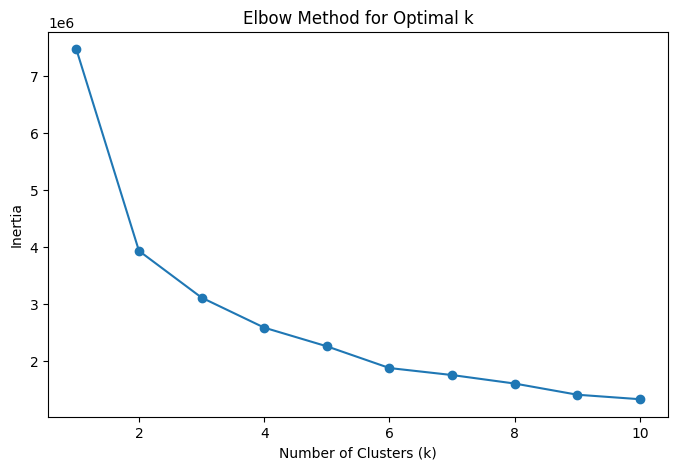

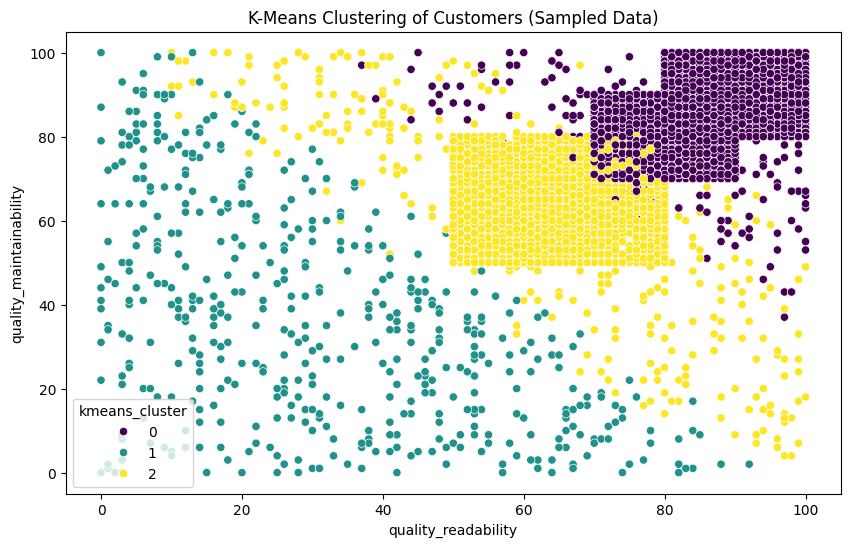

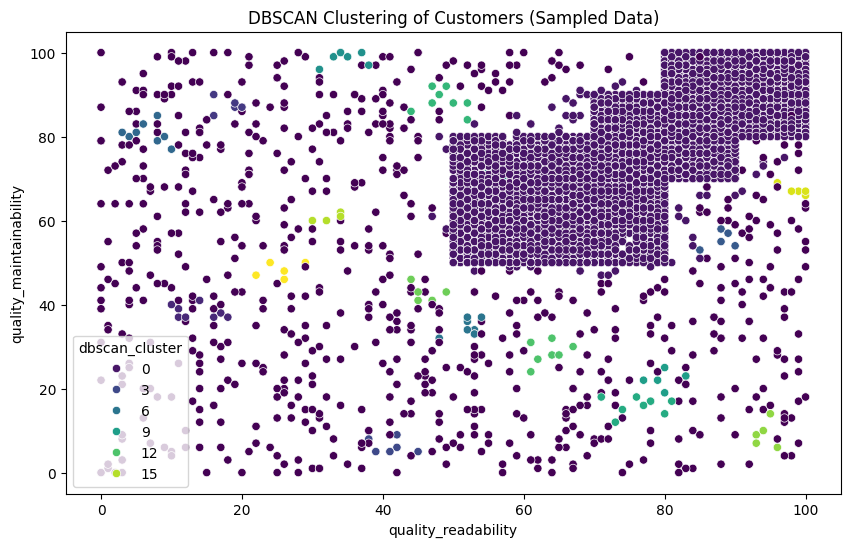

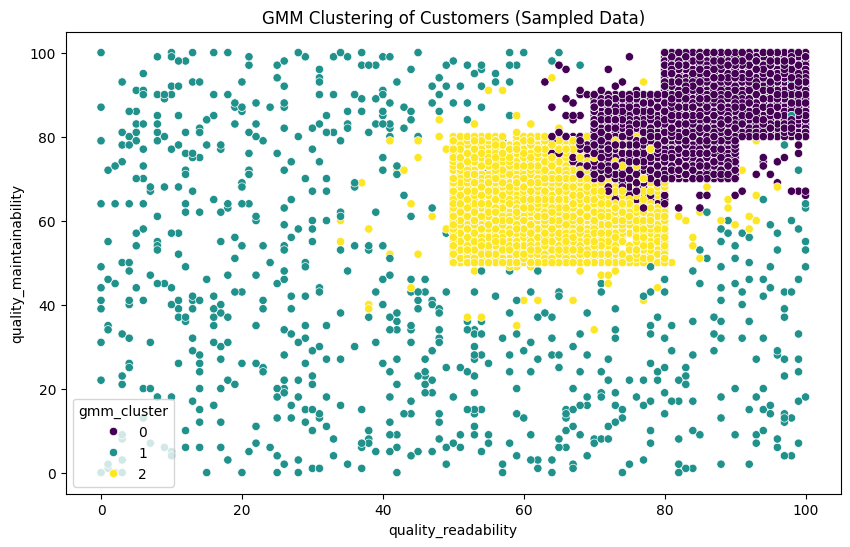

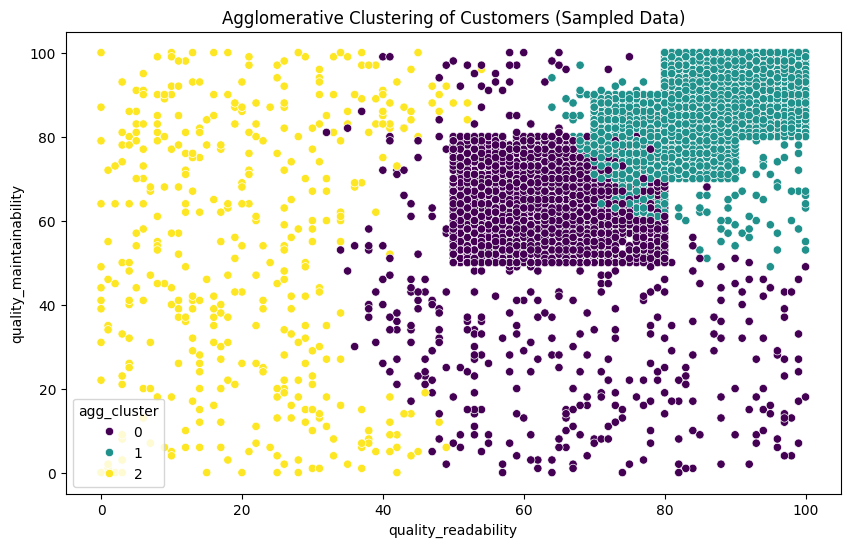

Mean Values for Clusters (kmeans_cluster):
                quality_readability  quality_maintainability  \
kmeans_cluster                                                 
0                         83.617500                83.624930   
1                         31.506024                36.644578   
2                         63.563729                63.316339   

                quality_modularity  
kmeans_cluster                      
0                        73.552666  
1                        66.781124  
2                        54.282593  

Customer Counts per Cluster (kmeans_cluster):
kmeans_cluster
0    5383
2    4119
1     498
Name: count, dtype: int64
Mean Values for Clusters (dbscan_cluster):
                quality_readability  quality_maintainability  \
dbscan_cluster                                                 
-1                        45.342318                47.025606   
 0                        75.256556                75.273164   
 1                        13.62500

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
import joblib  # For saving models

# Load the synthetic dataset
df = pd.read_csv("synthetic_code_quality_dataset.csv")

# Sample the dataset to reduce its size
sample_size = 10000  # Adjust this based on your RAM constraints
df_sampled = df.sample(n=sample_size, random_state=42)

# Select features for clustering
features = ["quality_readability", "quality_maintainability", "quality_modularity"]
X_sampled = df_sampled[features]

# 1. K-Means Clustering
def kmeans_clustering(X, df):
    # Determine the optimal number of clusters using the Elbow Method
    inertia = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    # Plot the Elbow Curve
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 11), inertia, marker="o")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia")
    plt.title("Elbow Method for Optimal k")
    plt.show()

    # Apply K-Means with the optimal k
    k = 3  # Example: Choose k based on the elbow curve
    kmeans = KMeans(n_clusters=k, random_state=42)
    df["kmeans_cluster"] = kmeans.fit_predict(X)

    # Save the K-Means model
    joblib.dump(kmeans, "kmeans_model.pkl")

    # Visualize the clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x="quality_readability", y="quality_maintainability", hue="kmeans_cluster", data=df, palette="viridis")
    plt.title("K-Means Clustering of Customers (Sampled Data)")
    plt.show()

    return df, kmeans

# 2. DBSCAN Clustering
def dbscan_clustering(X, df):
    # Apply DBSCAN
    dbscan = DBSCAN(eps=5, min_samples=5)
    df["dbscan_cluster"] = dbscan.fit_predict(X)

    # Save the DBSCAN model
    joblib.dump(dbscan, "dbscan_model.pkl")

    # Visualize the clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x="quality_readability", y="quality_maintainability", hue="dbscan_cluster", data=df, palette="viridis")
    plt.title("DBSCAN Clustering of Customers (Sampled Data)")
    plt.show()

    return df, dbscan

# 3. Gaussian Mixture Models (GMM)
def gmm_clustering(X, df):
    # Apply GMM
    gmm = GaussianMixture(n_components=3, random_state=42)
    df["gmm_cluster"] = gmm.fit_predict(X)

    # Save the GMM model
    joblib.dump(gmm, "gmm_model.pkl")

    # Visualize the clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x="quality_readability", y="quality_maintainability", hue="gmm_cluster", data=df, palette="viridis")
    plt.title("GMM Clustering of Customers (Sampled Data)")
    plt.show()

    return df, gmm

# 4. Agglomerative Clustering
def agglomerative_clustering(X, df):
    # Apply Agglomerative Clustering
    agg = AgglomerativeClustering(n_clusters=3)
    df["agg_cluster"] = agg.fit_predict(X)

    # Save the Agglomerative Clustering model
    joblib.dump(agg, "agg_model.pkl")

    # Visualize the clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x="quality_readability", y="quality_maintainability", hue="agg_cluster", data=df, palette="viridis")
    plt.title("Agglomerative Clustering of Customers (Sampled Data)")
    plt.show()

    return df, agg

# 5. Generate Actionable Insights
def generate_insights(df, cluster_column):
    # Calculate mean values for each cluster
    cluster_means = df.groupby(cluster_column)[features].mean()
    print(f"Mean Values for Clusters ({cluster_column}):")
    print(cluster_means)

    # Count the number of customers in each cluster
    cluster_counts = df[cluster_column].value_counts()
    print(f"\nCustomer Counts per Cluster ({cluster_column}):")
    print(cluster_counts)

    # Generate actionable insights
    insights = []
    for cluster in cluster_means.index:
        insight = {
            "cluster": cluster,
            "readability": cluster_means.loc[cluster, "quality_readability"],
            "maintainability": cluster_means.loc[cluster, "quality_maintainability"],
            "modularity": cluster_means.loc[cluster, "quality_modularity"],
            "count": cluster_counts[cluster]
        }
        insights.append(insight)

    # Convert insights to a DataFrame
    insights_df = pd.DataFrame(insights)
    return insights_df

# Run all clustering and analysis functions on the sampled data
df_sampled, kmeans = kmeans_clustering(X_sampled, df_sampled)
df_sampled, dbscan = dbscan_clustering(X_sampled, df_sampled)
df_sampled, gmm = gmm_clustering(X_sampled, df_sampled)
df_sampled, agg = agglomerative_clustering(X_sampled, df_sampled)

# Generate insights for each clustering method
kmeans_insights = generate_insights(df_sampled, "kmeans_cluster")
dbscan_insights = generate_insights(df_sampled, "dbscan_cluster")
gmm_insights = generate_insights(df_sampled, "gmm_cluster")
agg_insights = generate_insights(df_sampled, "agg_cluster")

# Save insights to CSV
kmeans_insights.to_csv("kmeans_insights.csv", index=False)
dbscan_insights.to_csv("dbscan_insights.csv", index=False)
gmm_insights.to_csv("gmm_insights.csv", index=False)
agg_insights.to_csv("agg_insights.csv", index=False)

# Save the final sampled dataset with cluster assignments
df_sampled.to_csv("clustered_customers_sampled.csv", index=False)

print("Models and insights saved successfully!")